# Creating animations with Flat and ffmpeg

By [Allison Parrish](http://www.decontextualize.com)

This notebook demonstrates how to produce animations with [Flat](https://xxyxyz.org/flat), [ipywidgets](https://ipywidgets.readthedocs.io/) and [ffmpeg](https://ffmpeg.org/). The notebook builds on examples from [Material of Language](https://github.com/aparrish/material-of-language/), and in particular assumes that you're familiar with the material in this [interactive widgets tutorial](interactive-widgets.ipynb). In the notebook, I show two techniques for generating animations:

* Use [the ipywidgets Play widget](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)
* Export an image sequence, then convert the image sequence to a video file with `ffmpeg`

> Note: There are a number of ways to convert image sequences to video files: here are [instructions for QuickTime Player in macOS Catalina 10.15](https://support.apple.com/guide/quicktime-player/create-a-movie-with-an-image-sequence-qtp315cce984/mac); or see documentation on [similar functionality in Adobe Premiere Pro](https://helpx.adobe.com/premiere-pro/using/importing-still-images.html) and [After Effects](https://helpx.adobe.com/after-effects/using/preparing-importing-still-images.html#import_a_single_still_image_or_a_still_image_sequence). If you have access to those tools and prefer to use them, then you can ignore the content about ffmpeg below.

Make sure you have ffmpeg installed before you begin. If you're using macOS, I again recommend using [Homebrew](https://brew.sh/) to install it: `brew install ffmpeg`. You can also install it with Anaconda:

    conda install -c conda-forge ffmpeg

The notebook assumes that the `ffmpeg` command is available in your shell's path. To check, try running the following:

In [1]:
!ffmpeg

ffmpeg version 4.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with clang version 4.0.1 (tags/RELEASE_401/final)
  configuration: --prefix=/Users/allison/opt/miniconda3/envs/material-of-language-2020 --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100
  libavdevice    58.  8.100 / 58.  8.100
  libavfilter     7. 57.100 /  7. 57.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  5.100 /  5.  5.100
  libswresample   3.  5.100 /  3.  5.100
  libpostproc    55.  5.100 / 55.  5.100
Hyper fast Audio and Video encoder
usage: ffmpeg [options] [[infile options] -i infile]... {[outfile op

If you get a `command not found` error message (or similar), then you either don't have ffmpeg installed, or ffmpeg isn't in your shell's path—you'll have to fix that problem before you proceed! (If you're in my class, don't hesitate to send me an e-mail and I can help you sort it out.

Some code preliminaries:

In [5]:
from IPython.display import display, Image, HTML

In [6]:
import ipywidgets as widgets

In [7]:
from flat import document, shape, rgb

The cell below takes a Flat `page` object and displays it inline in Jupyter notebook:

In [8]:
from IPython.display import SVG, display
def show(page):
    display(SVG(page.svg()))

## Animating with ipywidgets `Play`

For our purposes, we'll define an "animation" as a series of images (or "frames") that are shown in succession quickly enough that they can produce the illusion of motion (taking advantage of [beta movement](https://en.wikipedia.org/wiki/Beta_movement)). Our strategy for producing an animation in Python is to write a function that takes an integer parameter that indicates the current frame index, and return an image for the corresponding frame. This is close to the way that (e.g.) the `draw()` function in [p5.js](https://p5js.org/) works, except there is no canvas that persists between frames, and you have to call the function yourself for each of the frames you want to generate.

The primary strategy for generating an animation in this notebook is writing a function like this and then calling it in a loop. But a super easy way to experiment with animation is [ipywidget's `Play` control](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Play-(Animation)-widget). This widget produces a sequence of increasing integers after you press a "Play" button, which you can connect to a function with `widgets.interact()`. Here's a quick example that just prints those integers:

In [11]:
def print_val(step=0):
    print(step)

In [12]:
play_widget = widgets.Play(min=0, max=30, interval=100)
widgets.interact(print_val, step=play_widget)

interactive(children=(Play(value=0, description='step', max=30), Output()), _dom_classes=('widget-interact',))

<function __main__.print_val(step=0)>

When you press the play button, you should see an increasing series of integers. The `interval` parameter sets the number of milliseconds that the `Play` widget waits between calls to the function.

To animate a Flat drawing, take your existing (non-animated) code and put it in a function that accepts a parameter and returns a Flat `page` object. The parameter will receive the value from the `Play` widget, which you can think of as the number of the frame that the function should draw in your animation. (In the following examples, I've called this parameter `step`, but you can call it whatever you want.)

The code below implements a simple example of this:

In [14]:
def render(step=0):
    page = document(80, 80, 'mm').addpage()
    page.place(shape().nostroke().fill(rgb(255, 255, 255)).rectangle(0, 0, 80, 80))
    page.place(shape().nostroke().fill(rgb(40, 40, 160)).ellipse(40, 40, step, step*1.5))
    return page

As specified above, this function takes a parameter `step` and returns a Flat `page`. The code in the function creates the page, draws a white rectangle on the page (an opaque background), and then draws a blue ellipse over that rectangle. The size of the ellipse is determined by the `step` parameter.

You can call this function with an integer to see what the animation looks like on the corresponding frame.

In [15]:
show(render(5))

In [16]:
show(render(35))

Now we can animate this with the `Play` widget, although there is a bit of glue that we need first to put everything together. The `render()` function doesn't actually *show* the page, it just *returns* the page. So in order to use this function with `widgets.interact()`, you need a second little function that just shows the page that `render()` returns:

In [17]:
def render_and_show(step=0):
    show(render(step))

Now you can call `widgets.interact()` with this function and a `Play` widget:

In [19]:
widgets.interact(render_and_show, step=widgets.Play(min=0, max=30, interval=1000/30))

interactive(children=(Play(value=0, description='step', interval=33, max=30), Output()), _dom_classes=('widget…

<function __main__.render_and_show(step=0)>

Nice! Note the `interval` parameter: `1000/30` gives us one thousand milliseconds (=one second) divided by thirty, i.e., the number of milliseconds between frames if you want to show thirty frames per second.

## Exporting image sequences

The technique above (using the `Play` widget) might be enough for you! There is no way to export a video file directly using the `Play` widget, but you could use [licecap](https://www.cockos.com/licecap/) to capture a GIF right from the screen, or do a screen recording with (e.g.) QuickTime Player. The primary disadvantage is that you can't control the actual frame rate: the `Play` widget attempts to update every `interval` milliseconds, but may not actually succeed in drawing that frequently (if, for example, your computer isn't fast enough to render your scene that quickly). You're also limited to generating images whose resolution is less than the size of your browser window.

If you want a bit more control over timing and size of your animations, the most flexible workflow involves generating a sequence of image files, then converting those image files to a video file. This is a standard workflow, and is supported by a number of video editing tools. In order to keep things programmatic, open source and cross-platform, we'll be using the excellent [ffmpeg](https://ffmpeg.org/), a command line tool for editing video files.

### Generating images with Flat

In order to produce a *sequence* of images, we first need to be able to generate a *single* image. Flat provides a built-in means of doing this: the `.image()` method of a `page` object. For example, using the `render()` function above:

In [31]:
page = render(10)
png_bytes = page.image(ppi=72, kind='rgb').png()
png_bytes[:100]

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xe3\x00\x00\x00\xe3\x08\x02\x00\x00\x00\xf8\xec4\x1b\x00\x00\x08;IDATx\x9c\xed\xdd\xffOUu\x1c\xc7\xf1\xfe\x1c\x01q:\xa5\xcd\xb1U*}qm\xfd\x90\xcb\xd5V\xb3\xdc\xe4\x17W\xce\xda,g_f?\x94\x99mn5\x9a+\x9b\x17\xb9\xa8\t\x06ffA\x90%'

This chain of method calls evaluates to the binary data of a PNG image, which we could then write to disk. The problem with this technique is that Flat's PNG renderer is *very slow*, potentially taking several hundred milliseconds to render even very simple drawings. A hundred milliseconds doesn't sound like much, but when you're rendering thousands of frames, it can easily add up.

For this reason, I recommend using [CairoSVG](https://cairosvg.org/) to render Flat-produced SVG code as PNG images. In my initial round of benchmarking, CairoSVG renders Flat page objects to PNG 30x-50x faster than Flat's built-in code.

Install CairoSVG with Anaconda, which will also install tricky system dependencies:

    conda install -c conda-forge cairosvg
    
If you're not using Anaconda, you can install using `pip`:

    pip install cairosvg
    
Though I *think* installing from `pip` will lead to trouble if you don't already have [Cairo](https://www.cairographics.org/) installed. (If you're on macOS, I recommend using [Homebrew](https://brew.sh/) to install Cairo: `brew install cairo`.)

If none of that works, don't fret—you can use still Flat's built-in PNG renderer. (Just remember that this is a bit slower than using CairoSVG.) The function below takes a Flat page as a parameter, then converts it to a PNG byte string, using CairoSVG if it's available and the Flat's PNG renderer otherwise:

In [35]:
def page2png(page, dpi=72):
    try:
        import cairosvg
        png_bytes = cairosvg.svg2png(page.svg(), dpi=dpi)
    except ModuleNotFoundError:
        png_bytes = page.image(ppi=dpi, kind='rgb').png()
    return png_bytes

Testing it out:

In [36]:
png_data = page2png(render(10))

In [37]:
png_data[:100]

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xe2\x00\x00\x00\xe2\x08\x02\x00\x00\x00\xdcr\x8c\x80\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00\x08\xf9IDATx\x9c\xed\xddklTe\x1e\xc7\xf1gfJ;\xb0\xed\xf6fK\xb7\\\x04j\x97\xb2\x91\xda\xe5"\xd9\x94\xab1@\xb2\x98\x80\x1aHT'

The function returns raw PNG data. You can see what it looks like using IPython's `Image()` function, which will automatically recognize the data format and show the image in the notebook:

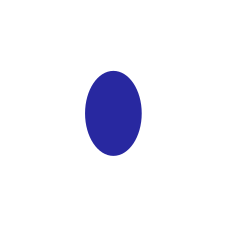

In [38]:
display(Image(png_data))

### Putting together filenames

Okay, so now we can generate image data from a Flat page. To generate an animation, we need to generate an image for each frame of our animation, and then write that image out to disk as a file. We're potentially going to generate a *lot* of images, so it'll probably be best to put them in a directory on their own. The code in the following cell makes a subdirectory called `render` in the same directory as this notebook:

In [39]:
!mkdir render

mkdir: render: File exists


If you just wanted to write a single image, you could do the following:

In [42]:
with open("render/test.png", "wb") as fh:
    fh.write(page2png(render(10)))

Use your file browser to check the `render` subdirectory. You should see a file called `test.png` in there. ([More information on reading and writing files in Python](https://realpython.com/read-write-files-python/).)

But we need to generate *multiple* frames, and each frame needs its own filename. Furthermore, those filenames should indicate the order in which the image falls in the sequence. The code in the following cell shows how to use a Python f-string to generate a filename for ten frames in a `for` loop:

In [43]:
for i in range(10):
    fname = f"render/image{i:05}.png"
    print(fname)

render/image00000.png
render/image00001.png
render/image00002.png
render/image00003.png
render/image00004.png
render/image00005.png
render/image00006.png
render/image00007.png
render/image00008.png
render/image00009.png


Note that this code doesn't actually generate the images—I just wanted to show how to create the filenames. The leading zeroes are important—ffmpeg expects them, and in any case the files wouldn't strictly be in alphabetical order without them.

### Writing each frame

The code below puts it all together. Looping from zero to thirty, it creates a filename, generates PNG data for that frame, then writes the PNG data to the file:

In [48]:
for i in range(30):
    fname = f"render/image{i:05}.png"
    png_data = page2png(render(i))
    with open(fname, "wb") as fh:
        fh.write(png_data)

In [49]:
!ls render

image00000.png image00006.png image00012.png image00018.png image00024.png
image00001.png image00007.png image00013.png image00019.png image00025.png
image00002.png image00008.png image00014.png image00020.png image00026.png
image00003.png image00009.png image00015.png image00021.png image00027.png
image00004.png image00010.png image00016.png image00022.png image00028.png
image00005.png image00011.png image00017.png image00023.png image00029.png


The code in the cell below should open your operating system's file browser (e.g., macOS Finder) and show the `render` directory. If you enable the file browser's preview function, you can move up and down the file listing and see the animation.

In [50]:
!open render

Now we can use [ffmpeg](https://ffmpeg.org/) to convert the image sequence to an animation. The following command uses ffmpeg's `image2` input format, reads from the image sequence, then writes out an `.mp4` file with the H.264 codec and `yuv420p` pixel format (all good defaults for creating cross-platform video files):

In [51]:
!ffmpeg -loglevel warning -y \
    -framerate 30 -f image2 -i render/image%05d.png \
    -vcodec libx264 -crf 10 -pix_fmt yuv420p render/output.mp4

You should see a file called `output.mp4` in the `render` directory that has one second of video.

The cell above runs the `ffmpeg` command installed on your system. It's all one command, even though it's on multiple lines—as in Python, the backslash character (`\`) indicates a line continuation. (I separated it into multiple lines to make it a bit easier to read.) Some explanations of the command line options:

* `-loglevel warning`: Restrict output to warnings; without this ffmpeg will print a page or two of informational output. (Which looks cool but isn't terribly interesting in most cases.)
* `-y`: Always overwrite existing files without asking for confirmation. (Without this option, ffmpeg will hang if it has to ask you a question when you run it from Jupyter Notebook.)
* `-f image2`: Use the `image2` format for input. (This is how you get `ffmpeg` to read a sequence of images.)
* `-i render/image%05d.png`: The input parameter for `image2`, which tells `ffmpeg` to look for files whose names match a particular pattern. Check the ffmpeg documentation for [more information about valid filename patterns](https://www.ffmpeg.org/ffmpeg-formats.html#image2-1).
* `-vcodec libx264`: This tells `ffmpeg` to use [H.264](https://en.wikipedia.org/wiki/Advanced_Video_Coding) as the output video codec (which is probably always what you want).
* `-crf 10`: Controls the quality of the output. Lower is better. (A value of 0 is completely lossless but produces very large files; the maximum value is 51.) [More information on the `crf` parameter](https://trac.ffmpeg.org/wiki/Encode/H.264)
* `-pix_fmt yuv420p`: Sets the pixel format for the output video; `yuv420p` is almost certainly what you want. (If you leave out this parameter or use a different value, the video might not work in certain players.)

The final parameter is the name of the file that you want to write, the format of which `ffmpeg` guesses by the file extension you specify.

To display the video in the notebook:

In [63]:
from IPython.display import HTML
display(HTML("""
    <video alt="rendered output" controls>
        <source src="render/output.mp4" type="video/mp4">
    </video>
"""))

You can also make GIFs with `ffmpeg`. (This example is adapted from the code on this [wonderful Giphy Engineering blog post](https://engineering.giphy.com/how-to-make-gifs-with-ffmpeg/).)

In [64]:
!ffmpeg -loglevel warning -y \
    -framerate 30 -f image2 -i render/image%05d.png \
    -filter_complex "[0:v] split [a][b];[a] palettegen [p];[b][p] paletteuse" render/output.gif

To display a GIF in the notebook:

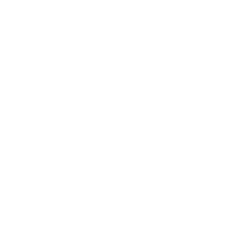

In [62]:
display(Image(open("render/output.gif", "rb").read()))

## Complete examples

I've written some more complete examples below so you can see how this strategy works in practice. First, a few bits of code we'll use in both of the examples:

In [142]:
from bezmerizing import Polyline, Path
from copy import copy
import numpy as np

### Animating letters

This example adapts the ["one character at a time" example from the Manipulating Fonts notebook](manipulating-font-data.ipynb#One-character-at-a-time). Instead of drawing the characters at random positions once, it draws characters at random positions and—as the number of frames progresses—moves those letters back to their "original" positions.

Loading the font and copying over some helpful functions:

In [143]:
from flat import font

In [144]:
f = font.open("NotoSans-Regular.ttf")

In [145]:
def glyphcommands(f, ch):
    return Path([copy(cmd) for cmd in f.glyph(f.charmap[ord(ch)])])
def advancefor(f, ch):
    return f.advances[f.charmap[ord(ch)]]

Here's our source string (feel free to change this):

In [86]:
s = "quartzy foxes"

And the `render()` function for this example. Some notes:

* You *need* to draw a background for the video to work! Flat pages have a transparent background by default, and the encoded video will show transparent backgrounds as all black. If you want the letters in this example to show up, you need to draw a white background on every frame.
* If you're using a random number generator, either seed the generator with the same seed on every frame (as discussed in the [interactive widgets notebook](interactive-widgets.ipynb)) or use a random number generation technique (like [simplex noise](https://github.com/lmas/opensimplex) that allows you to ask for random numbers at particular seed values.
* In the example below, the `end_frame` variable specifies how many frames the animation should last; the `fraction` variable inside the function calculates a value from 0 to 1 that indicates how much of the animation has passed given a particular `step` value. This is then used as a multiplier on the random values added to the `x` and `y` coordinates of each glyph. (Subtracting this value from 1, as I did below, essentially "reverses" the animation, moving the characters back into position instead of moving them progressively further away.)

In [136]:
end_frame = 60
def render(step=0):
    np.random.seed(12345)
    page = document(300, 90, 'pt').addpage()
    bg_pen = shape().nostroke().fill(rgb(255, 255, 255))
    page.place(bg_pen.rectangle(0, 0, 300, 90))
    pen = shape().nostroke().fill(rgb(0, 0, 0))
    factor = 36 / f.density
    cx = 0
    fraction = 1 - (step / end_frame)
    for ch in s:
        glyph_path = (glyphcommands(f, ch)
                      .scale(factor)
                      .translate(cx + (np.random.normal(0, 30) * fraction),
                                 60 + (np.random.normal(0, 30) * fraction)))
        page.place(pen.path(glyph_path))
        cx += advancefor(f, ch) * factor
    return page

Render and show at a particular frame:

In [146]:
show(render(30))

And preview with `widgets.interact()`:

In [139]:
widgets.interact(lambda step: show(render(step)),
                 step=widgets.Play(min=0, max=end_frame, interval=1000/30))

interactive(children=(Play(value=0, description='step', interval=33, max=60), Output()), _dom_classes=('widget…

<function __main__.<lambda>(step)>

(The `lambda step: show(render(step))` syntax there is a shorthand way of writing the `show_and_render()` function from above. [More on lambda functions.](https://realpython.com/python-lambda/))

Finally, the code below writes each of the frames, from zero up to `end_frame`:

In [140]:
for i in range(end_frame):
    fname = f"render/image{i:05}.png"
    png_data = page2png(render(i))
    with open(fname, "wb") as fh:
        fh.write(png_data)

And then we convert those frames to mp4:

In [141]:
!ffmpeg -loglevel warning -y \
    -framerate 30 -f image2 -i render/image%05d.png \
    -vcodec libx264 -crf 10 -pix_fmt yuv420p render/output.mp4

### Dancing asemic forms (advanced)

The code below makes animated versions of the glyphs described in the [k-means glyphs](kmeans-glyphs.ipynb) notebook. First, here's a copy of the necessary function for producing a single glyph:

In [147]:
from sklearn.cluster import MiniBatchKMeans

In [148]:
def kmeans_glyph(n_clusters=6):
    data = np.random.uniform(low=-0.5, high=0.5, size=(500, 2))
    km = MiniBatchKMeans(n_clusters=n_clusters, max_iter=25)
    km.fit(data)
    np.random.shuffle(km.cluster_centers_)
    return Polyline(km.cluster_centers_)

The code below draws a single glyph:

In [198]:
glyph = kmeans_glyph(10).scale(100).translate(50, 50)
glyph_poly = glyph.fancy_curve(samples_per=24,
                               thicknesses=[2.5, 1.5, 0.5, 2],
                               tightness=-0.5)
page = document(100, 100, 'mm').addpage()
brush = shape().nostroke().fill(rgb(40, 40, 40))
page.place(brush.polygon(glyph_poly))
show(page)

The code below generates two glyphs. Because the glyphs have the same number of points, we can smoothly interpolate between them using numpy's [`np.linspace()` function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) on the Polyline's `.vertices` (i.e., the underlying numpy array). The resulting value is an array of `n_frames` with one entry per intermediate point on the interpolation between the two forms. This `render()` function draws a fancy curve from the `Polyline` produced at each point.

In [151]:
n_frames = 25
glyph_a = kmeans_glyph(10).scale(100).translate(50, 50)
glyph_b = kmeans_glyph(10).scale(100).translate(50, 50)
interp = np.linspace(glyph_a.vertices, glyph_b.vertices, n_frames+1)
def render(step=0):
    this_glyph = Polyline(interp[step])
    glyph_poly = this_glyph.augment().fancy_curve(samples_per=24,
                               thicknesses=[2.5, 1.5, 0.5, 2],
                               tightness=-0.5)
    page = document(100, 100, 'mm').addpage()
    brush = shape().nostroke().fill(rgb(40, 40, 40))
    page.place(brush.polygon(glyph_poly))
    return page

Here's what it looks like:

In [152]:
widgets.interact(lambda step: show(render(step)),
                 step=widgets.Play(min=0, max=n_frames, step=1, interval=1000/30))

interactive(children=(Play(value=0, description='step', interval=33, max=25), Output()), _dom_classes=('widget…

<function __main__.<lambda>(step)>

That's one interpolation between two forms. The code in the cell below chains together multiple interpolations like this, forming one big list of interpolated forms. It ends with the same form it began with, so the video will loop seamlessly:

In [153]:
from itertools import chain

# canvas
width = 250
height = 250
# number of interpolations and steps per interpolation
n_interps = 12
n_steps = 24
interps = []
# generate interpolations
start = kmeans_glyph(10)
current = start
for i in range(n_interps):
    end = kmeans_glyph(10)
    interp = np.linspace(current.vertices, end.vertices, n_steps)
    # make the last value of this interpolation the first of the next
    current = end 
    interps.append(interp)
# loop back to first
interps.append(np.linspace(current.vertices, start.vertices, n_steps))
# flatten list of lists
interps = list(chain(*interps))

def render(step=0):
    this_glyph = Polyline(interps[step]).scale(width).translate(width*0.5, height*0.5)
    glyph_poly = this_glyph.augment().fancy_curve(samples_per=24,
                               thicknesses=[5, 3, 1, 4],
                               tightness=-0.5)
    page = document(width, height, 'mm').addpage()
    background = shape().nostroke().fill(rgb(255, 255, 255))
    brush = shape().nostroke().fill(rgb(40, 40, 40))
    page.place(background.rectangle(0, 0, width, height))
    page.place(brush.polygon(glyph_poly))
    return page

The Play widget preview:

In [154]:
widgets.interact(lambda step: show(render(step)),
                 step=widgets.Play(min=0, max=len(interps)-1, step=1, interval=1000/30))

interactive(children=(Play(value=0, description='step', interval=33, max=311), Output()), _dom_classes=('widge…

<function __main__.<lambda>(step)>

Now to write the frames. I've put a little ad-hoc progress counter in the cell below, since it can take a bit of time to export each frame:

In [250]:
print(len(interps))
for i in range(len(interps)):
    print(i, end=" ")
    fname = f"render/image{i:05}.png"
    png_data = page2png(render(i))
    with open(fname, "wb") as fh:
        fh.write(png_data)

312
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 27

Aaaand convert to mp4:

In [251]:
!ffmpeg -loglevel warning -y \
    -framerate 30 -f image2 -i render/image%05d.png \
    -vcodec libx264 -crf 10 -pix_fmt yuv420p render/output.mp4

## Benchmarking Flat `image().png()` versus CairoSVG `svg2png`

In [33]:
import random
import cairosvg
%timeit cairosvg.svg2png(render(random.randrange(0, 30)).svg(), dpi=72)

3.61 ms ± 77.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
%timeit render(random.randrange(0, 30)).image(ppi=72, kind='rgb').png()

131 ms ± 3.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
